<a href="https://colab.research.google.com/github/mnocerino23/NBA-Player-Classifier/blob/main/dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this notebook we experiment with Decision Trees to build a binary classifier to decide who does and does not deserve a max contract. In this revised jupyter notebook, we try to remove outliers and see how this effects the decision tree model

In [836]:
import pandas as pd
import sklearn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [837]:
complete = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/NBA/complete22-23.csv')

In [838]:
complete.head(4)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST_TOV,OWS_div_USG,TS_times_USG,bigmanD,foul_rate,three_rate,PTs_per_36,PF_per_dplay,FG_TOV,two_way
0,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,...,0.818182,0.041237,10.7476,0.251208,0.091787,21.505376,16.000000,1.727273,3.727273,38.690909
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,...,1.210526,0.089041,8.2344,0.314815,0.085185,0.000000,11.466667,1.150000,1.947368,87.500000
2,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,...,1.280000,0.142857,14.9184,0.251445,0.080925,1.324503,21.225434,1.400000,3.200000,101.840000
3,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,...,1.571429,0.056962,8.8638,0.092683,0.082927,37.500000,13.873171,2.833333,6.000000,6.440678


In [839]:
#note that some players have multiple positions
complete['Pos'].unique()

array(['C', 'SG', 'PF', 'PG', 'SF', 'PF-SF', 'SF-SG', 'SG-PG'],
      dtype=object)

In [840]:
#we want to make sure each player has only one position to limit the amount of categories for Pos.
#although we don't need to one hot encode for our tree based model, limiting all 
#entries to just one position is still important

for index, rows in complete.iterrows():
  #if the position has length greater than two (meaning it isn't C, PG, SG, SF, or PF), we shorten it to the first position
  if len(complete.at[index, 'Pos']) > 2:
    complete.at[index, 'Pos'] = complete.at[index, 'Pos'][:2]

# Players with salaries over 25 million will be considered max level players while those under with be considered "Not max"

In [841]:
#use a lambda function to assign classes
complete['Class'] = complete['Salary'].apply(lambda x: 'Max' if x >= 30 else 'Not Max')

In [842]:
#the count of each class in the dataset before splitting
complete['Class'].value_counts()

Not Max    406
Max         44
Name: Class, dtype: int64

Before splitting into train-test, we need to drop outliers that have been identified such as John Wall, Gordon Hayward, and Ben Simmons. These are players who have all severly fallen off after receiving max contracts and should not appear in the training set.

In [843]:
#need to remove john wall, Gordon Hayward, Ben Simmons from the training sert

In [844]:
need_to_remove = ['John Wall', 'Gordon Hayward', 'Ben Simmons']
for player in need_to_remove:
  complete = complete.drop(complete[complete['Player'] == player].index)

In [845]:
print(list(complete['Player']))

['Precious Achiuwa', 'Steven Adams', 'Bam Adebayo', 'Ochai Agbaji', 'Santi Aldama', 'Nickeil Alexander-Walker', 'Grayson Allen', 'Jarrett Allen', 'Jose Alvarado', 'Kyle Anderson', 'Giannis Antetokounmpo', 'Thanasis Antetokounmpo', 'Cole Anthony', 'OG Anunoby', 'Ryan Arcidiacono', 'Deni Avdija', 'Deandre Ayton', 'Udoka Azubuike', 'Marvin Bagley III', 'Patrick Baldwin Jr.', 'LaMelo Ball', 'Mo Bamba', 'Paolo Banchero', 'Desmond Bane', 'Dalano Banton', 'Dominick Barlow', 'Harrison Barnes', 'Scottie Barnes', 'RJ Barrett', 'Will Barton', 'Charles Bassey', 'Keita Bates-Diop', 'Nicolas Batum', 'Darius Bazley', 'Bradley Beal', 'Malik Beasley', 'MarJon Beauchamp', 'Dāvis Bertāns', 'Patrick Beverley', 'Saddiq Bey', 'Khem Birch', 'Goga Bitadze', 'Bismack Biyombo', 'Bogdan Bogdanović', 'Bojan Bogdanović', 'Bol Bol', 'Devin Booker', 'Brandon Boston Jr.', 'Chris Boucher', 'James Bouknight', 'Malaki Branham', 'Christian Braun', 'Mikal Bridges', 'Oshae Brissett', 'Malcolm Brogdon', 'Dillon Brooks', 'Br

In [846]:
from sklearn.model_selection import train_test_split, cross_val_score

In [847]:
#split into input features and target variable class
X = complete.drop(columns = ['Salary', 'Class'], axis = 1)
y = complete['Class']

In [848]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size=0.20, shuffle = True)

In [849]:
#X_train.loc[X_train['Class'] == 1]['Player']

In [850]:
#drop the names column before proceeding
names_train = list(X_train['Player'])
X_train.drop(columns = ['Player', 'Pos', 'Tm'], axis = 1, inplace = True)
names_test = list(X_test['Player'])
X_test.drop(columns = ['Player', 'Pos', 'Tm'], axis = 1, inplace = True)

In [851]:
print('Train:')
print('train_features dimensions: ', X_train.shape)
print('train_target dimensions: ', y_train.shape, '\n')


print('Test:')
print('test_features dimensions: ', X_test.shape)
print('test_target dimensions: ', y_test.shape)

Train:
train_features dimensions:  (357, 59)
train_target dimensions:  (357,) 

Test:
test_features dimensions:  (90, 59)
test_target dimensions:  (90,)


In [852]:
import sklearn
from sklearn import tree

In [853]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
,recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn

Make a chart similar to that which we used in HW2 to find the best max_depth when critirion = entropy

In [854]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8]
train_accuracies = []
test_accuracies = []
for i in max_depths:
  dts = tree.DecisionTreeClassifier(random_state = 7, max_depth = i, criterion = 'entropy')
  dts.fit(X_train, y_train)
  class_predicted_train = dts.predict(X_train)
  class_predicted_test = dts.predict(X_test)

  train_accuracies.append(accuracy_score(class_predicted_train, y_train))
  test_accuracies.append(accuracy_score(class_predicted_test, y_test))

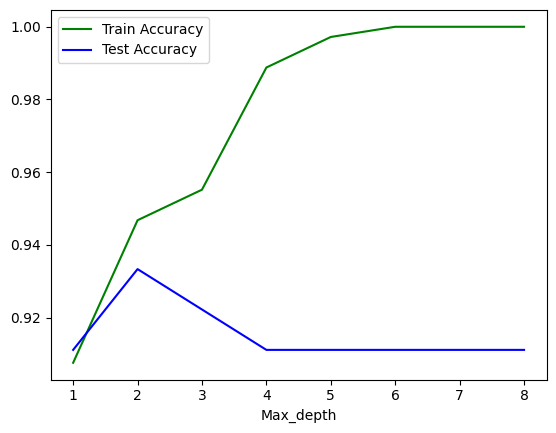

In [855]:
#create a graph of train/test accuracy vs. max depth as we did in class

import seaborn as sns
import matplotlib.pyplot as plt


# plot each line
plt.plot(max_depths, train_accuracies, label='Train Accuracy', color = 'green')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', color = 'blue')
#add an x-axis label for max depth
plt.xlabel("Max_depth")

#add legend
plt.legend()
plt.show()

In [856]:
#use a max_depth of 3 for this decision tree to avoid overfitting the data
dt = tree.DecisionTreeClassifier(random_state= 7, max_depth = 3, criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

In [857]:
class_predicted = dt.predict(X_test)

# Create a dataframe predictions

In [858]:
predictions = pd.DataFrame({'Name': names_test, 'Real label': y_test, 'Prediction': class_predicted})

In [859]:
print("Correct Predictions: ")
for index, rows in predictions.iterrows():
  if predictions.at[index, 'Real label'] == predictions.at[index, 'Prediction']:
    print(predictions.at[index, 'Name'], '-', predictions.at[index,'Real label'])

Correct Predictions: 
Kenyon Martin Jr. - Not Max
Monte Morris - Not Max
Xavier Tillman Sr. - Not Max
Javonte Green - Not Max
Kennedy Chandler - Not Max
Richaun Holmes - Not Max
Jake LaRavia - Not Max
Khem Birch - Not Max
Bryn Forbes - Not Max
Nassir Little - Not Max
Derrick Jones Jr. - Not Max
Kevon Harris - Not Max
Jevon Carter - Not Max
R.J. Hampton - Not Max
Dalen Terry - Not Max
Payton Pritchard - Not Max
Landry Shamet - Not Max
Thaddeus Young - Not Max
Stanley Johnson - Not Max
Gorgui Dieng - Not Max
Walker Kessler - Not Max
Kyrie Irving - Max
Josh Giddey - Not Max
Jonas Valančiūnas - Not Max
Justise Winslow - Not Max
Terry Rozier - Not Max
Willy Hernangómez - Not Max
John Butler - Not Max
Paul George - Max
Caleb Martin - Not Max
Tari Eason - Not Max
Josh Richardson - Not Max
Mo Bamba - Not Max
Mark Williams - Not Max
Wenyen Gabriel - Not Max
Bogdan Bogdanović - Not Max
LeBron James - Max
Jarred Vanderbilt - Not Max
Jae'Sean Tate - Not Max
Boban Marjanović - Not Max
Mitchell Robi

# Dataframe showing the models missed predictions (where the model disagrees with true label)

In [860]:
predictions.loc[predictions['Real label'] != predictions['Prediction']].reset_index(drop = True)

,Name,Real label,Prediction
0,Bradley Beal,Max,Not Max
1,Jaren Jackson Jr.,Not Max,Max
2,Ja Morant,Not Max,Max
3,Mikal Bridges,Not Max,Max
4,Fred VanVleet,Not Max,Max
5,Russell Westbrook,Max,Not Max
6,Devin Vassell,Not Max,Max


In [861]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [862]:
print("Accuracy: ", accuracy_score(class_predicted, y_test))
#print("F1: ", f1_score(class_predicted, y_test))
#print("Precision: ", precision_score(class_predicted, y_test))
#print("Recall: ", recall_score(class_predicted, y_test))

Accuracy:  0.9222222222222223


# Confusion matrix for the model's performance on the test data

[[ 6  2]
 [ 5 77]]


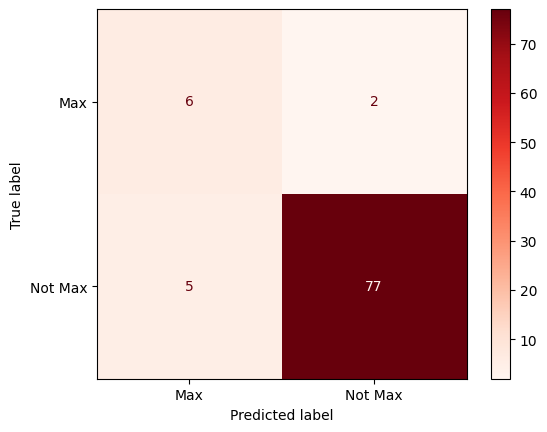

In [863]:
disp = ConfusionMatrixDisplay.from_estimator(
        dt,
        X_test,
        y_test,
        cmap=plt.cm.Reds,
    )

print(disp.confusion_matrix)

# Investigate how the model learned on the training data we provided

In [864]:
class_pred = dt.predict(X_train)

In [865]:
predictions2 = pd.DataFrame({'Name': names_train, 'Real label': y_train, 'Prediction': class_pred})

In [866]:
predictions2.loc[predictions2['Real label'] != predictions2['Prediction']]

,Name,Real label,Prediction
6,Grayson Allen,Not Max,Max
296,Dejounte Murray,Not Max,Max
61,Jalen Brunson,Not Max,Max
441,Zion Williamson,Not Max,Max
134,Darius Garland,Not Max,Max
23,Desmond Bane,Not Max,Max
97,DeMar DeRozan,Not Max,Max
410,Nikola Vučević,Not Max,Max
143,Rudy Gobert,Max,Not Max
269,Tyrese Maxey,Not Max,Max


# Print the 41 players deserving of the max as identified by the model

In [867]:
predictions2.loc[(predictions2['Real label'] == 'Max') & (predictions2['Prediction'] == 'Max')]

,Name,Real label,Prediction
141,Shai Gilgeous-Alexander,Max,Max
336,Kristaps Porziņģis,Max,Max
183,Jrue Holiday,Max,Max
115,Kevin Durant,Max,Max
334,Michael Porter Jr.,Max,Max
372,Pascal Siakam,Max,Max
10,Giannis Antetokounmpo,Max,Max
243,Kawhi Leonard,Max,Max
92,Anthony Davis,Max,Max
46,Devin Booker,Max,Max


[[ 32   1]
 [ 15 309]]


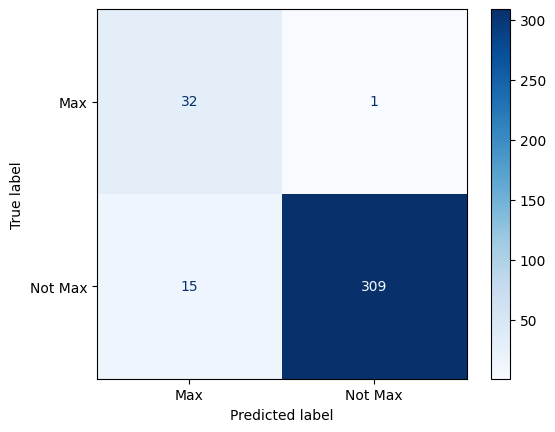

In [868]:
disp = ConfusionMatrixDisplay.from_estimator(
        dt,
        X_train,
        y_train,
        cmap=plt.cm.Blues,
    )

print(disp.confusion_matrix)

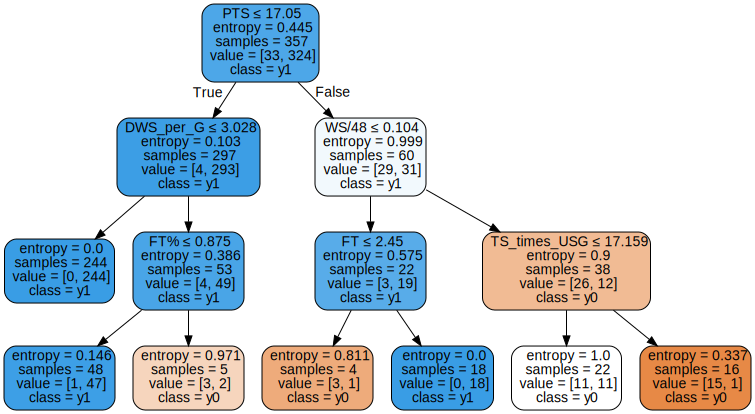

In [869]:
from sklearn.tree import export_graphviz
import graphviz


graphic = export_graphviz(dt, out_file=None, 
                           feature_names=X_train.columns, class_names=True, 
                            filled = True, rounded=True, special_characters=True, )

# Render the GraphViz object as an image
graph = graphviz.Source(graphic)
display(graph)